In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [77]:
df = pd.read_csv('/content/Customer-Churn.csv')

# Data Cleaning

In [78]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert **TotalCharges** to numerical data (from object). This will cause you to have null values because there may be blank strings before the conversion.

In [80]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Monthly charges have now been converted to 'float64'. You will need to impute missing values (i.e. estimate and fill in missing values with substitue values)

In [81]:
#We are going to impute missing data with the mean value (pandas method) of the entire column
df.TotalCharges.mean()

#The calculated mean is assigned to a variable so it can be used later
mean_total_charges = df.TotalCharges.mean()

#df['TotalCharges'] selects the 'Total Charges' column in the DataFrame
# .fillna() method finds and fills in all missing values
# The assignment operator (=) overwrites the original 'TotalCharges' column with the new version

df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now, we need to remove any irrelevant columns: customerID
1. .drop() is a pandas method to remove rows or columns from a df

2.   axis parameter tells pandas *WHAT* to drop: 1 = column, 0 = row (axis = 1: "hey I want you to look for this label among the columns)
3. inplace controls how the operation is performed.


*   **inplace = false**: a new dataframe with the selected column removed will be made, but the original dataframe will still have that column in tact. You will need to assign the new dataframe to a new variable (new_df = df.drop('customerID'...)
*   **inplace = true**: the operation is performed DIRECTLY on the original dataframe. It modifies the df and returns none (i.e. you won't need to assign the new dataframe to a variable since the original has already been modified)





In [83]:
df.drop('customerID', axis=1, inplace=True)
#alternate way: df = df.drop('customerID, axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [85]:
# Give a descriptive statistic (count, mean, std, min, max, quartile) for all numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Binning:
The process of turning continuous data into a categorical one by group values into intervals, known as 'bins' or 'buckets'. We use the pd.cut() pandas method for this.





In [86]:
# Define the bin edges. We go from 0 to 73 to ensure 72 is included in the last bin.
bin_edges = [0, 12, 24, 36, 48, 60, 73] # 0-12, 12-24, 24-36, 36-48, 48-60, 60-72
bin_labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72']

df['tenure_group'] = pd.cut(df['tenure'], bins=bin_edges, labels=bin_labels, include_lowest=True)
#include_lowest=True allows you to include 0 in the first bin.

# Check the value counts to see the distribution
print(df['tenure_group'].value_counts().sort_index())

tenure_group
0-12     2186
12-24    1024
24-36     832
36-48     762
48-60     832
60-72    1407
Name: count, dtype: int64


In [87]:
# The column 'tenure' was dropped because we don't need it after binning (reduces redundancy)
df.drop('tenure', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

# Exploratory Data Analysis

In [88]:
# Display basic info

print(f"Total customers: {len(df)}")

print("\nAge distribution")
senior_counts = df['SeniorCitizen'].value_counts()
senior_percent = df['SeniorCitizen'].value_counts(normalize=True) * 100

for val, count, percent in zip(senior_counts.index, senior_counts.values, senior_percent.values):
    status = "Senior Citizen" if val == 1 else "Non-Senior"
    print(f"{status}: {count} customers ({percent:.1f}%)")

print(f"\nGender distribution:")
print(df['gender'].value_counts())
print(df['gender'].value_counts(normalize=True).map("{:.1%}".format))

# Calculate churn rate by gender
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
gender_churn_rates = gender_churn['Yes'].reset_index()
gender_churn_rates.columns = ['Gender', 'Churn_Rate']

# Print churn rates by gender
print("\nChurn rate by gender:")
for index, row in gender_churn_rates.iterrows():
    print(f"{row['Gender']}: {row['Churn_Rate']:.1f}%")

print(f"\nOverall churn rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.1f}%")

Total customers: 7043

Age distribution
Non-Senior: 5901 customers (83.8%)
Senior Citizen: 1142 customers (16.2%)

Gender distribution:
gender
Male      3555
Female    3488
Name: count, dtype: int64
gender
Male      50.5%
Female    49.5%
Name: proportion, dtype: object

Churn rate by gender:
Female: 26.9%
Male: 26.2%

Overall churn rate: 26.5%


# Univariate Analysis & Bivariate Analysis

This involves analysing single variables (numerical & categorical data)

Analysis on the demographic

---



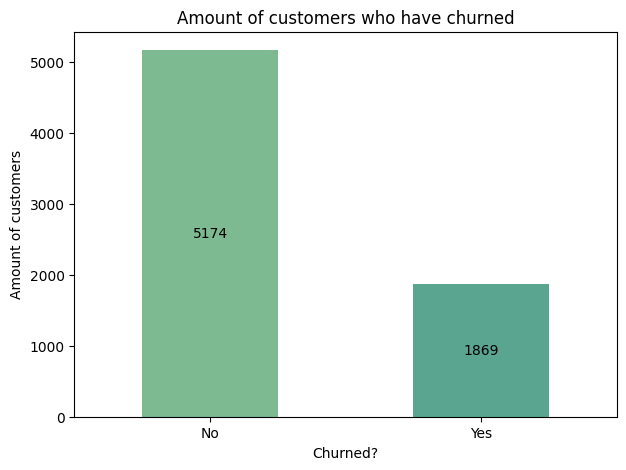

In [89]:
# Start with how many customers have churned
plt.figure(figsize=(7, 5))
churn = df['Churn'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Amount of customers who have churned')
plt.xlabel('Churned?')
plt.ylabel('Amount of customers')
plt.xticks(rotation=0)

for container in churn.containers:
    churn.bar_label(container, label_type='center', fmt='%d', padding=0, color='black', fontweight='normal')
plt.show()


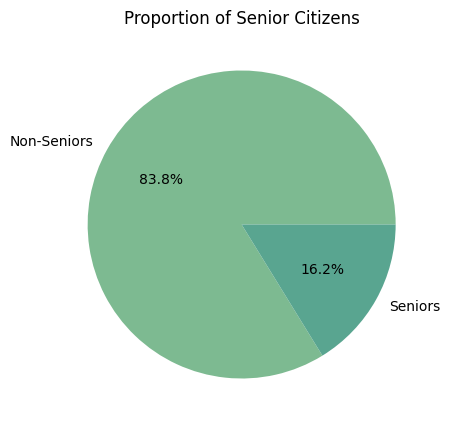

In [125]:
# Map SeniorCitizen values to descriptive labels
df['SeniorCitizen_Label'] = df['SeniorCitizen'].map({1: 'Seniors', 0: 'Non-Seniors'})

# Create pie chart with mapped labels
plt.figure(figsize=(5, 5))
df['SeniorCitizen_Label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('crest'),
    labels=['Non-Seniors', 'Seniors']
)
plt.title('Proportion of Senior Citizens')
plt.ylabel('')  # Hides the y-label
plt.show()

In [91]:
senior_counts = df['SeniorCitizen'].value_counts()
senior_percent = df['SeniorCitizen'].value_counts(normalize=True) * 100
for val, count, percent in zip(senior_counts.index, senior_counts.values, senior_percent.values):
    status = "Senior Citizen" if val == 1 else "Non-Senior"
    print(f"{status}: {count} customers ({percent:.1f}%)")
print("\n")

Non-Senior: 5901 customers (83.8%)
Senior Citizen: 1142 customers (16.2%)




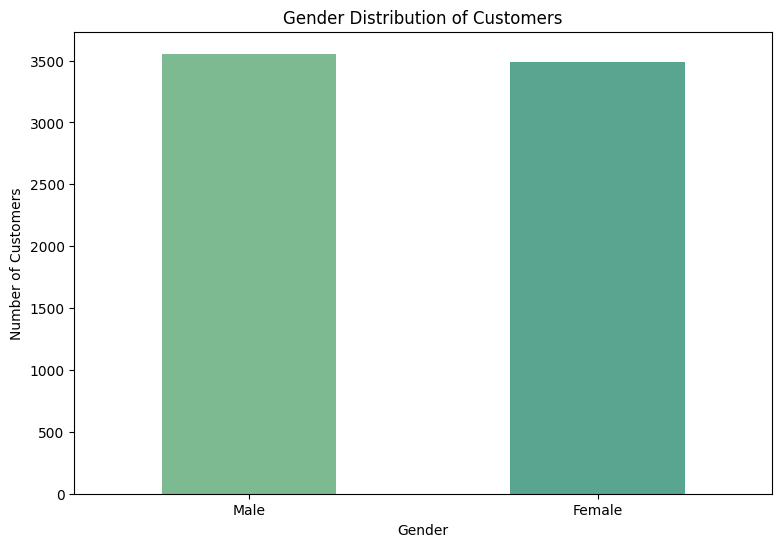

In [92]:
# Distribution of gender in customers
plt.figure(figsize=(9, 6))
df['gender'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.show()


In [93]:
# Create crosstab to see how many customers churned, depending on gender
churn_crosstab_of_gender = pd.crosstab(df['gender'], df['Churn'])
print(churn_crosstab_of_gender)

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


<Figure size 1000x600 with 0 Axes>

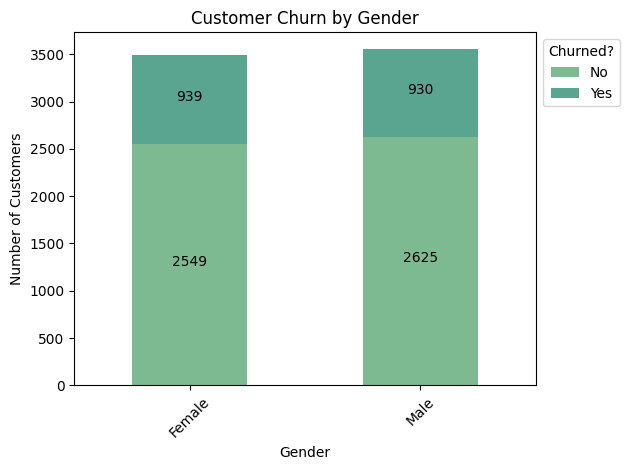

In [94]:
# Create barplot
plt.figure(figsize=(10,6))
g_c = churn_crosstab_of_gender.plot(kind='bar', stacked=True, color=sns.color_palette('crest'))

plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churned?', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

# 1. Annotate the segments
for container in g_c.containers:
    g_c.bar_label(container, label_type='center', fmt='%d', padding=2, color='black', fontweight='normal')

plt.tight_layout()
plt.show()

 How long do customers normally stay with the company?




---



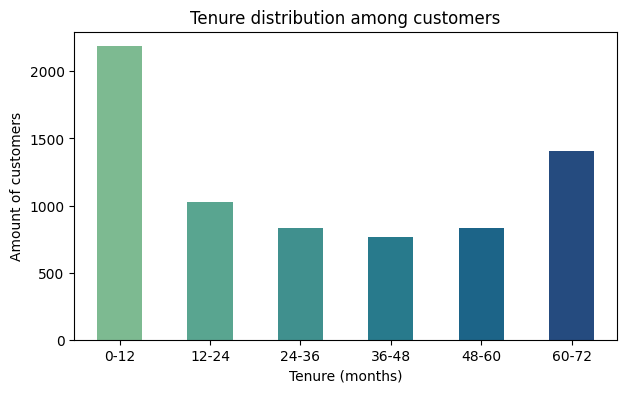

In [124]:
# Creating a bar chart of the tenure bins

# Define the order of the tenure group bins
tenure_order = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72']

# Convert tenure_group to a categorical type with ascending order
df['tenure_group'] = pd.Categorical(df['tenure_group'], categories=
                                    tenure_order, ordered=True)

# Create bar chat
plt.figure(figsize=(7, 4))
df['tenure_group'].value_counts(sort=False).plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Tenure distribution among customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Amount of customers')
plt.xticks(rotation=0)
plt.show()


In [107]:
# Create crosstab to see how many customers churned, depending on tenure
churn_crosstab_of_tenure = pd.crosstab(df['tenure_group'], df['Churn'])
print(churn_crosstab_of_tenure)

Churn           No   Yes
tenure_group            
0-12          1149  1037
12-24          730   294
24-36          652   180
36-48          617   145
48-60          712   120
60-72         1314    93


<Figure size 1000x800 with 0 Axes>

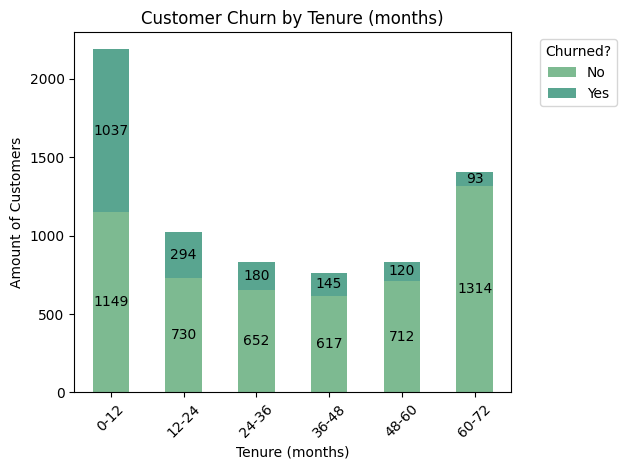

In [96]:
# Create visualisation
plt.figure(figsize=(10,8))
t_c = churn_crosstab_of_tenure.plot(kind='bar', stacked=True, color=sns.color_palette('crest'))
plt.title('Customer Churn by Tenure (months)')
plt.ylabel('Amount of Customers')
plt.xlabel('Tenure (months)')
plt.legend(title='Churned?', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1),
loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()



for container in t_c.containers:
    t_c.bar_label(container, label_type='center', fmt='%d', padding=0,
                  color='black', fontweight='normal')
plt.show()

Which factors (payment method, internet service, contracts) affect churn rate?


---



In [97]:
# Find out the distribution of selected payment method by customers
print(df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


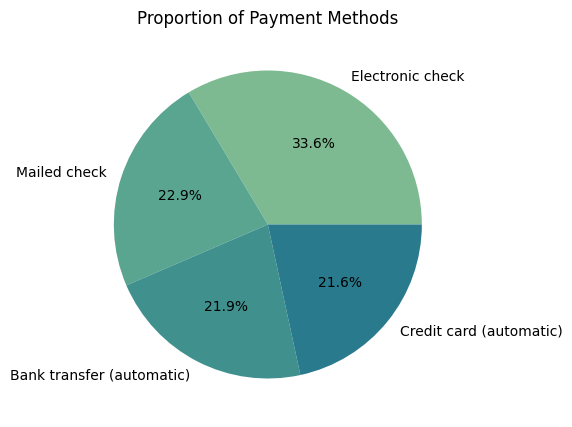

In [98]:
# Create visualisation
plt.figure(figsize=(5, 5))
df['PaymentMethod'].value_counts().plot(kind='pie',
                                        autopct='%1.1f%%',
                                        colors=sns.color_palette('crest'))
plt.title('Proportion of Payment Methods')
plt.ylabel('') # Hides the y-label
plt.show()

In [99]:
churn_crosstab_of_paymentmethod = pd.crosstab(df['PaymentMethod'], df['Churn'])
print(churn_crosstab_of_paymentmethod)

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


<Figure size 1500x800 with 0 Axes>

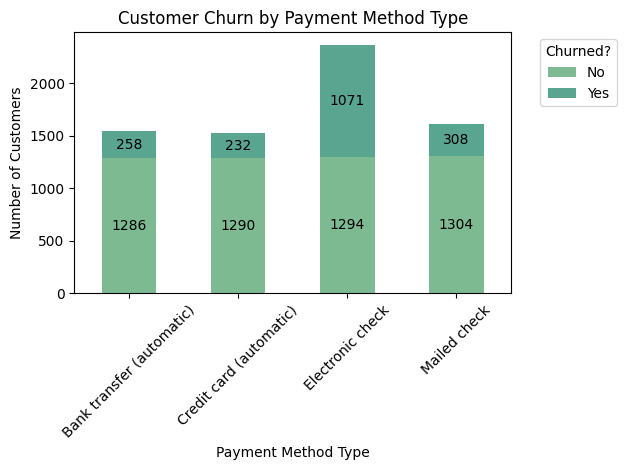

In [100]:
# Create the plot figure to see the churn rate per payment method
plt.figure(figsize=(15, 8))

# Plot the crosstab as a stacked bar chart
p_c= churn_crosstab_of_paymentmethod.plot(kind='bar', stacked=True,
                                          color=sns.color_palette('crest'))

# Add titles and labels
plt.title('Customer Churn by Payment Method Type')
plt.xlabel('Payment Method Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churned?', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1),
loc='upper left') # Move legend box outside of the plot area

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on segments
for container in p_c.containers:
    p_c.bar_label(container, label_type='center', fmt='%d', padding=0,
                 color='black', fontweight='normal')

plt.show()

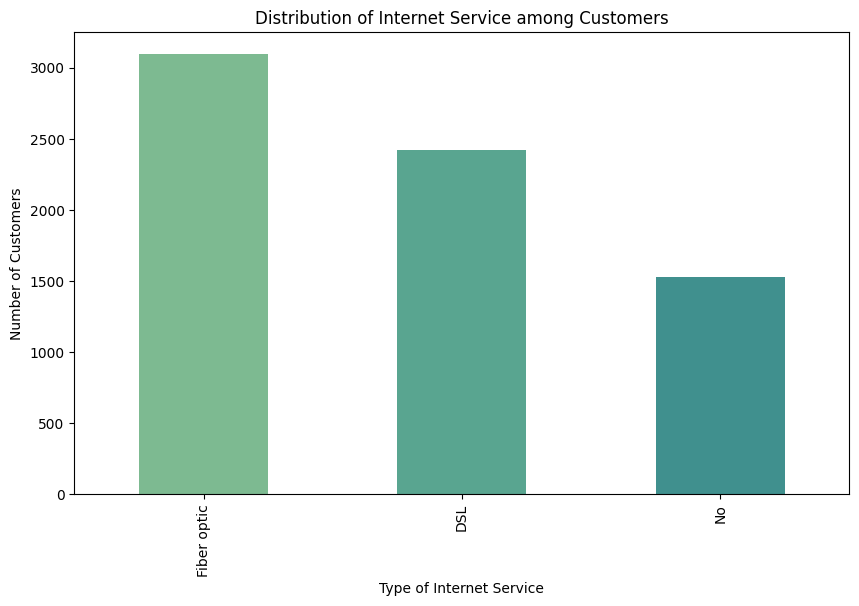

In [101]:
# Distribution of internet service type among customers
plt.figure(figsize=(10, 6))
df['InternetService'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Distribution of Internet Service among Customers')
plt.xlabel('Type of Internet Service')
plt.ylabel('Number of Customers')

plt.show()


<Figure size 1000x600 with 0 Axes>

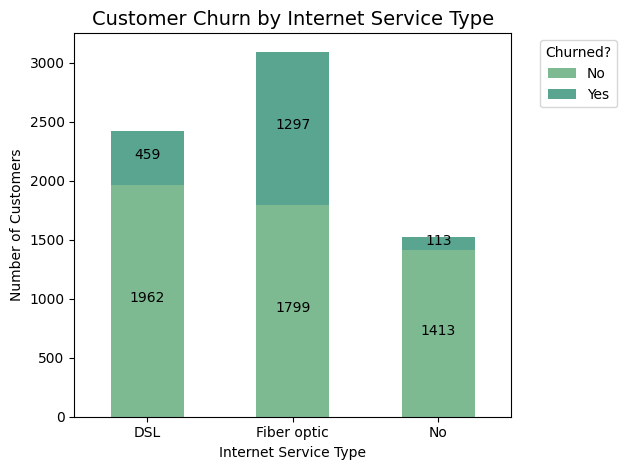

In [102]:
# Create crosstab to see how many customers churned, depending on internet service type
churn_crosstab = pd.crosstab(df['InternetService'], df['Churn'])

plt.figure(figsize=(10, 6))
i_c = churn_crosstab.plot(kind='bar', stacked=True, color=sns.color_palette('crest'))

plt.title('Customer Churn by Internet Service Type', fontsize=14, fontweight='normal')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churned?', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Add value labels on segments
for container in i_c.containers:
    i_c.bar_label(container, label_type='center', fmt='%d', padding=2,
                 color='black', fontweight='normal')

plt.tight_layout()
plt.show()

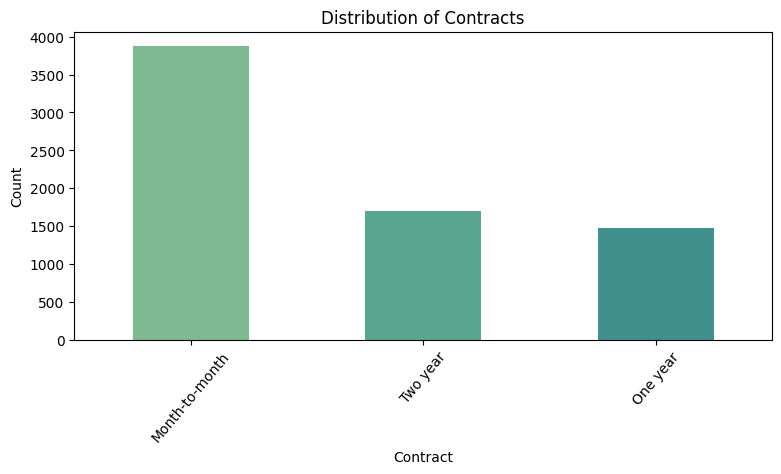

In [103]:
# Distribution of contract type between customer
plt.figure(figsize=(9, 4))
df['Contract'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Distribution of Contracts')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

In [104]:
# # Create crosstab to see how many customers churned, depending on contract length

churn_crosstab_of_contract = pd.crosstab(df['Contract'], df['Churn'])
print(churn_crosstab_of_contract)

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


<Figure size 1000x800 with 0 Axes>

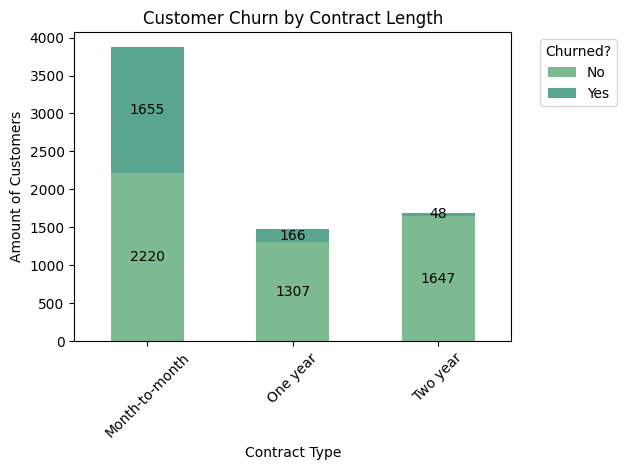

In [105]:
# Create visualisation
plt.figure(figsize=(10,8))
cl_c = churn_crosstab_of_contract.plot(kind='bar', stacked=True, color=sns.color_palette('crest'))
plt.title('Customer Churn by Contract Length')
plt.ylabel('Amount of Customers')
plt.xlabel('Contract Type')
plt.legend(title='Churned?', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1),
loc='upper left')

plt.xticks(rotation=45)

for container in cl_c.containers:
    cl_c.bar_label(container, label_type='center', fmt='%d', padding=0, color='black', fontweight='normal')

plt.tight_layout()
plt.show()

In [106]:
# Calculate churn rates by Contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn_rates = contract_churn['Yes'].reset_index()
contract_churn_rates.columns = ['Contract', 'Churn_Rate']

# Print churn rates by contract type
print("Churn Rates (%) by Contract Type:")
for index, row in contract_churn_rates.iterrows():
    print(f"{row['Contract']}: {row['Churn_Rate']:.1f}%")

Churn Rates (%) by Contract Type:
Month-to-month: 42.7%
One year: 11.3%
Two year: 2.8%


How the customers' social status can affect churn rates (single, with partner and/or has dependent(s))

---





/tmp/ipython-input-234345231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dependents', y='Churn_Rate', data=churn_rates, palette=sns.color_palette('crest'))
/tmp/ipython-input-234345231.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='Dependents', y='Churn_Rate', data=churn_rates, palette=sns.color_palette('crest'))


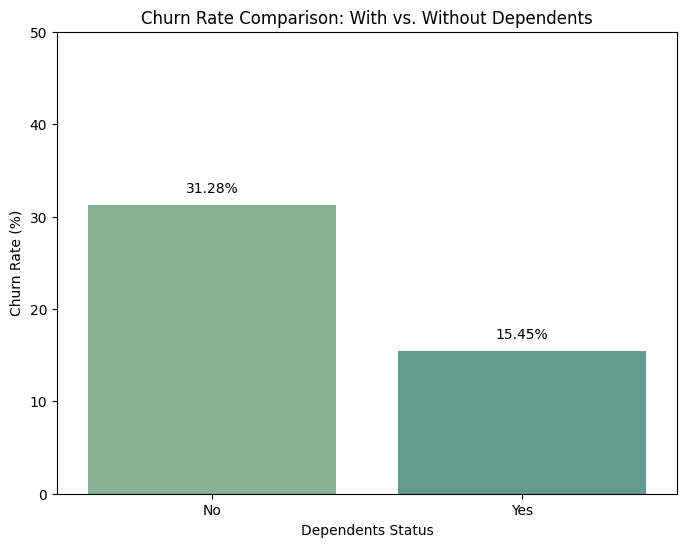

In [108]:
# Calculate churn rates by Dependents status
churn_by_dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack() * 100

# Extract churn rates for 'Yes' (churned)
churn_rates = churn_by_dependents['Yes'].reset_index()
churn_rates.columns = ['Dependents', 'Churn_Rate']

# Create visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x='Dependents', y='Churn_Rate', data=churn_rates, palette=sns.color_palette('crest'))
plt.title('Churn Rate Comparison: With vs. Without Dependents')
plt.xlabel('Dependents Status')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 50)  # Set y-axis limit for better visibility
for i, rate in enumerate(churn_rates['Churn_Rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom')
plt.show()

In [109]:
# Print customer counts for context
dependents_counts = df['Dependents'].value_counts()
print("\nCustomer Counts by Dependents Status:")
print(dependents_counts)


Customer Counts by Dependents Status:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


/tmp/ipython-input-1699693192.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partner', y='Churn_Rate', data=churn_rates, palette=sns.color_palette('crest'))
/tmp/ipython-input-1699693192.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='Partner', y='Churn_Rate', data=churn_rates, palette=sns.color_palette('crest'))


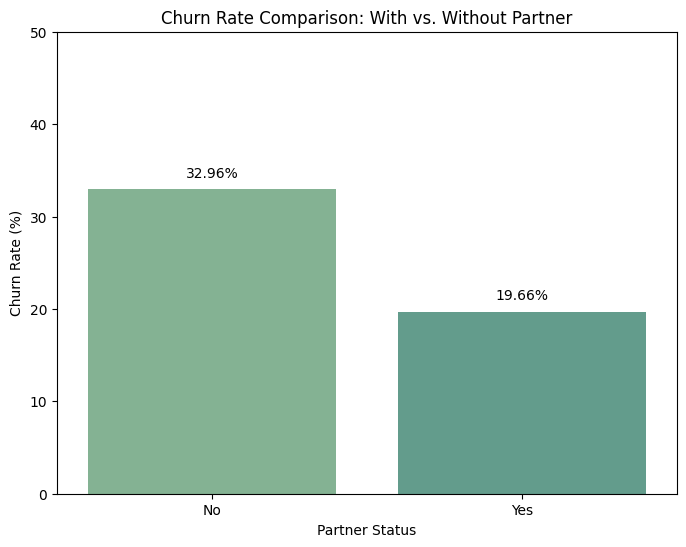

In [110]:
# Calculate churn rates by Partner status
churn_by_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack() * 100

# Extract churn rates for 'Yes' (churned)
churn_rates = churn_by_partner['Yes'].reset_index()
churn_rates.columns = ['Partner', 'Churn_Rate']

# Create visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x='Partner', y='Churn_Rate', data=churn_rates, palette=sns.color_palette('crest'))
plt.title('Churn Rate Comparison: With vs. Without Partner')
plt.xlabel('Partner Status')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 50)  # Set y-axis limit for better visibility
for i, rate in enumerate(churn_rates['Churn_Rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom')
plt.show()


In [111]:
# Print customer counts for context
partner_counts = df['Partner'].value_counts()
print("\nCustomer Counts by Partner Status:")
print(partner_counts)


Customer Counts by Partner Status:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


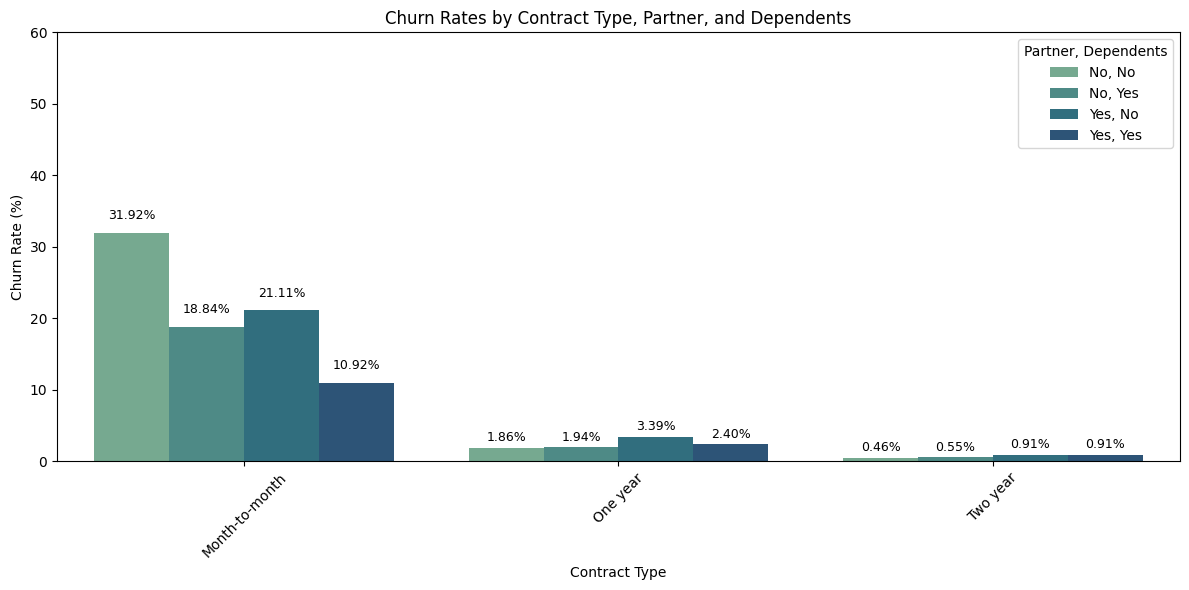

In [118]:
# Calculate churn rates for each combination of Partner, Dependents, and Contract
cross_tab_churn = pd.crosstab(
    [df['Partner'], df['Dependents']],
    [df['Contract'], df['Churn']],
    normalize='index'  # Proportion within each Partner-Dependents-Contract group
) * 100

# Extract churn rates ('Yes' for churn)
churn_rates = cross_tab_churn.xs('Yes', level='Churn', axis=1).reset_index()
churn_rates.columns = ['Partner', 'Dependents', 'Month-to-month', 'One year', 'Two year']

# Melt the data for grouped bar plot
churn_rates_melted = churn_rates.melt(
    id_vars=['Partner', 'Dependents'],
    value_vars=['Month-to-month', 'One year', 'Two year'],
    var_name='Contract',
    value_name='Churn_Rate'
)

# Create a combined column for Partner and Dependents for x-axis labels
churn_rates_melted['Partner_Dependents'] = churn_rates_melted['Partner'] + ', ' + churn_rates_melted['Dependents']

# Create grouped bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Contract',
    y='Churn_Rate',
    hue='Partner_Dependents',
    data=churn_rates_melted,
    palette=sns.color_palette('crest', n_colors=4)  # Use 'crest' palette with 4 colors for Partner-Dependents combinations
)
plt.title('Churn Rates by Contract Type, Partner, and Dependents')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 60)
plt.legend(title='Partner, Dependents', loc='upper right')

# Add annotations to all bars with adjusted positioning to avoid overlap
for container in barplot.containers:
    for bar in container:
        height = bar.get_height()
        # Label all bars, regardless of height
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1.5 if height > 10 else height + 0.5,  # Larger offset for taller bars, smaller for short bars
            f'{height:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# Cross-tabulation of customer counts for context
cross_tab_counts = pd.crosstab(
    [df['Partner'], df['Dependents']],
    df['Contract'],
    margins=True,
    margins_name='Total'
)

print("Churn Rates (%) by Partner, Dependents, and Contract:")
print(churn_rates)
print("\nCross-Tabulation of Customer Counts (Partner, Dependents, Contract):")
print(cross_tab_counts)

Churn Rates (%) by Partner, Dependents, and Contract:
  Partner Dependents  Month-to-month  One year  Two year
0      No         No       31.920732  1.859756  0.457317
1      No        Yes       18.836565  1.939058  0.554017
2     Yes         No       21.113128  3.387780  0.907441
3     Yes        Yes       10.920526  2.401372  0.914808

Cross-Tabulation of Customer Counts (Partner, Dependents, Contract):
Contract            Month-to-month  One year  Two year  Total
Partner Dependents                                           
No      No                    2288       558       434   3280
        Yes                    207        85        69    361
Yes     No                     798       384       471   1653
        Yes                    582       446       721   1749
Total                         3875      1473      1695   7043


Seeing if the presence of online security can influence churn rates within the senior and non-senior demographic


---



In [114]:
# Create analysis table
results = []
for senior in [0, 1]:
    for security in ['No', 'Yes']:
        subset = df[(df['SeniorCitizen'] == senior) &
                           (df['OnlineSecurity'] == security)]
        total = len(subset)
        churned = len(subset[subset['Churn'] == 'Yes'])
        churn_rate = (churned / total * 100) if total > 0 else 0

        results.append({
            'SeniorCitizen': 'Senior' if senior == 1 else 'Non-Senior',
            'OnlineSecurity': security,
            'Total Customers': total,
            'Churned Customers': churned,
            'Churn Rate (%)': churn_rate
        })

# Create DataFrame and display results
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
print("\n")

SeniorCitizen OnlineSecurity  Total Customers  Churned Customers  Churn Rate (%)
   Non-Senior             No             2690               1054       39.182156
   Non-Senior            Yes             1737                231       13.298791
       Senior             No              808                407       50.371287
       Senior            Yes              282                 64       22.695035




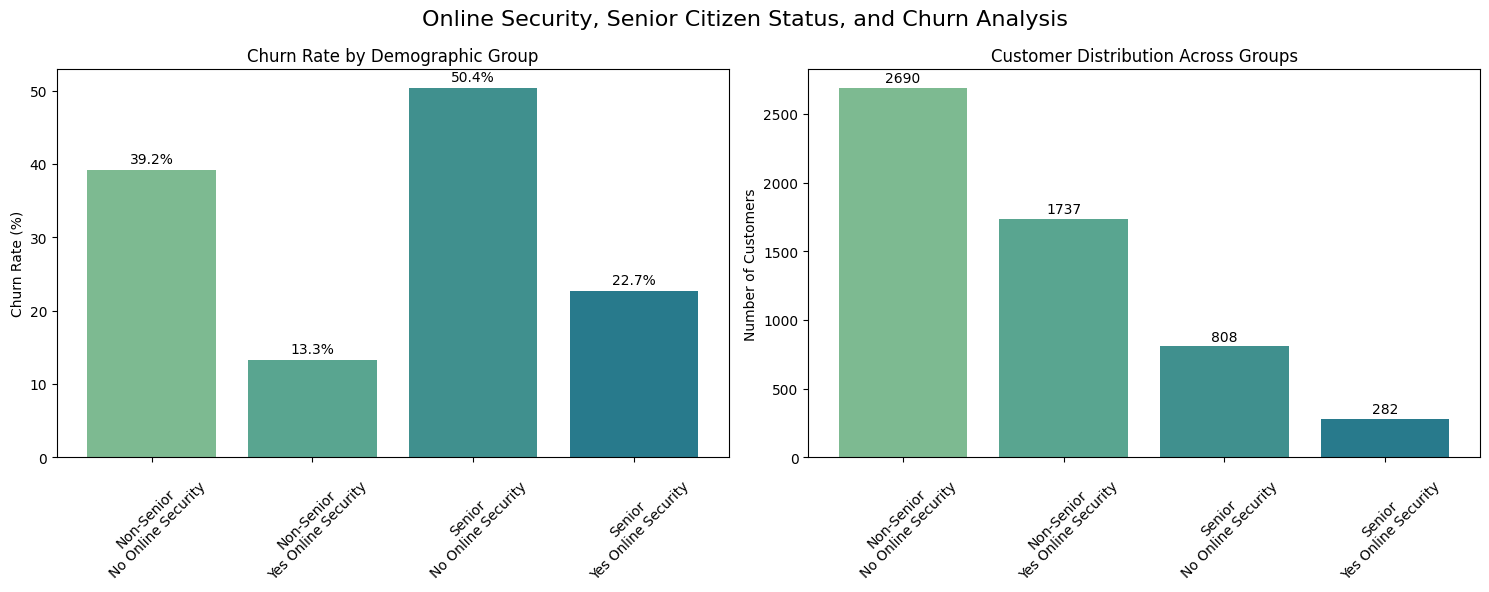

In [115]:
# Create visualizations
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Online Security, Senior Citizen Status, and Churn Analysis',
             fontsize=16, fontweight='normal')

# Plot 1: Churn Rates by Combination
categories = [f"{row['SeniorCitizen']}\n{row['OnlineSecurity']} Online Security"
              for _, row in results_df.iterrows()]
churn_rates = results_df['Churn Rate (%)']

bars = ax1.bar(categories, churn_rates, color=sns.color_palette('crest'))
ax1.set_title('Churn Rate by Demographic Group', fontweight='normal')
ax1.set_ylabel('Churn Rate (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)

# Add value labels on bars
for bar, rate in zip(bars, churn_rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='normal')

# Plot 2: Customer Counts by Group
customer_counts = results_df['Total Customers']
bars = ax2.bar(categories, customer_counts, color=sns.color_palette('crest'))
ax2.set_title('Customer Distribution Across Groups', fontweight='normal')
ax2.set_ylabel('Number of Customers')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(False)

# Add value labels on bars
for bar, count in zip(bars, customer_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count}', ha='center', va='bottom', fontweight='normal')

plt.tight_layout()
plt.show()

Comparing different variables by gender to see if gender has an effect on churn rate

---



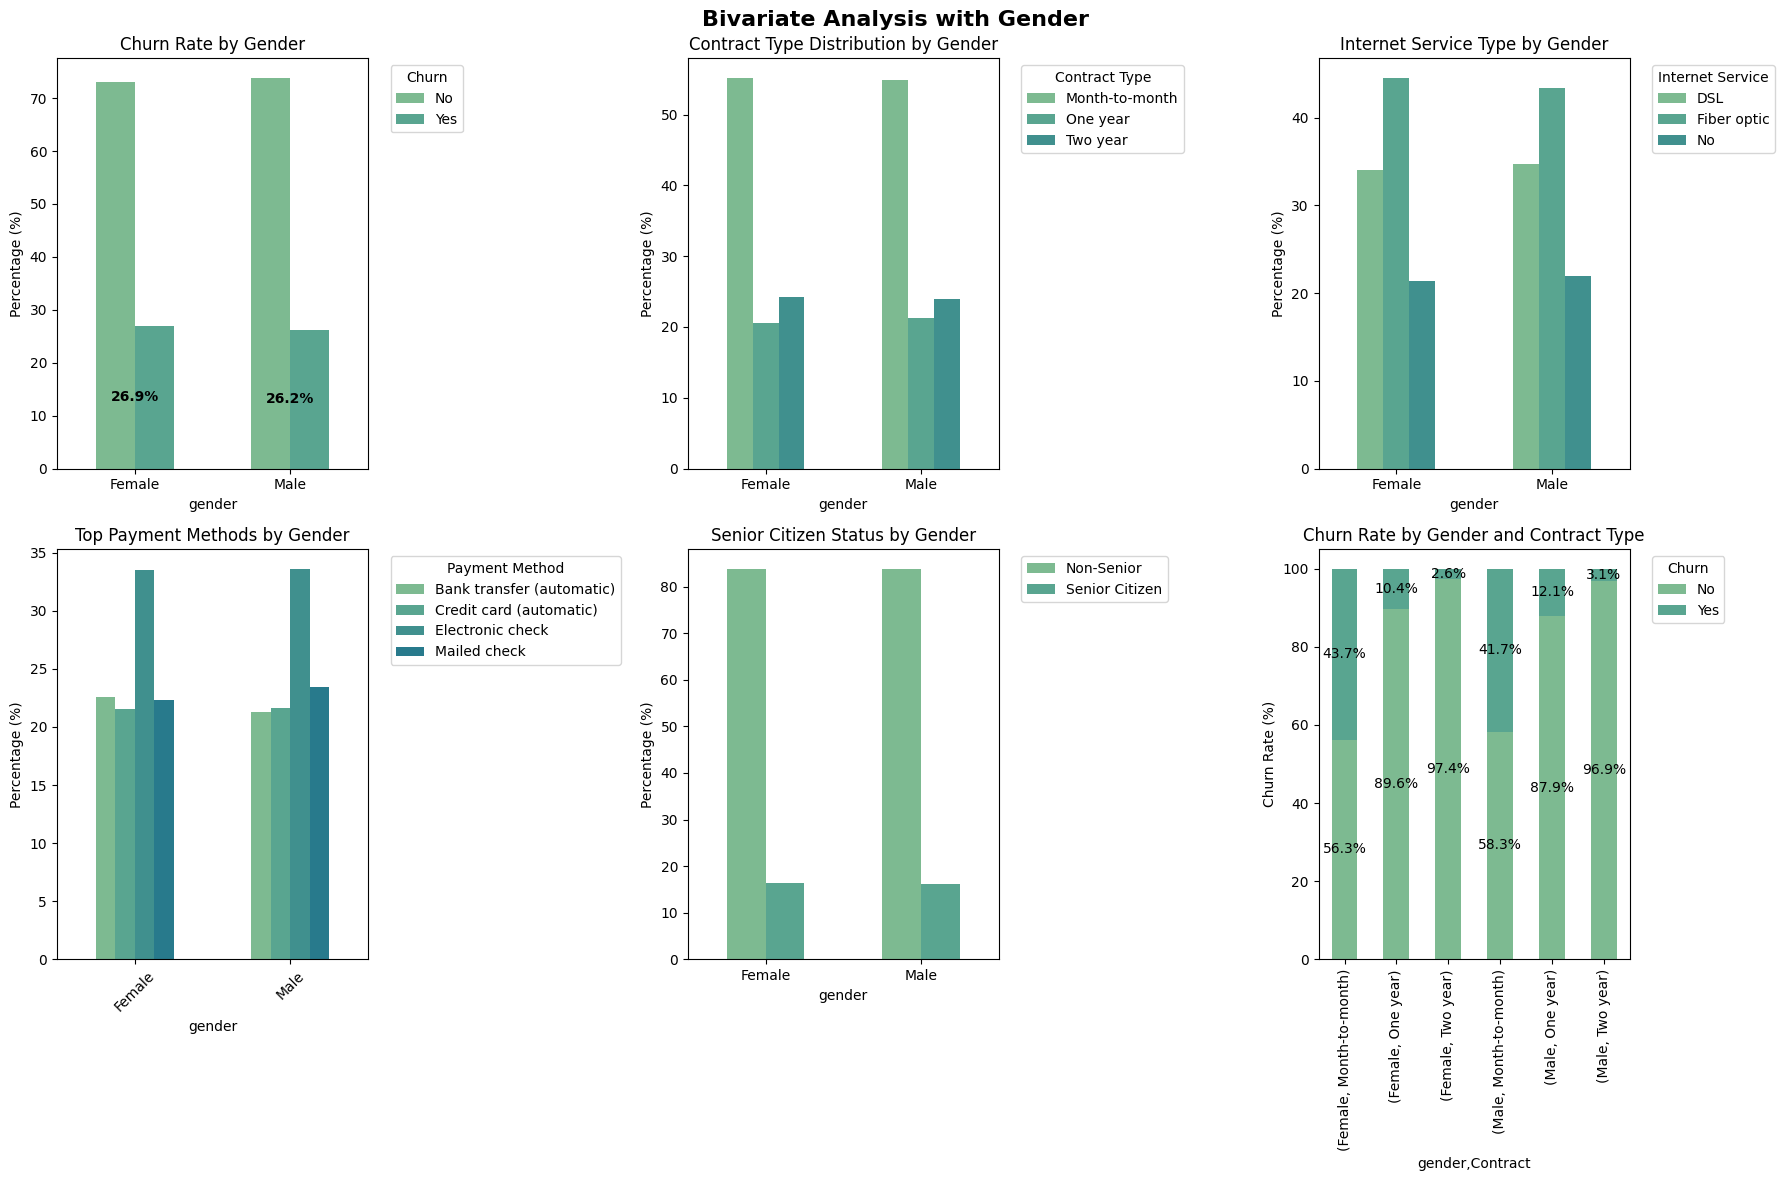

In [116]:
# 1. Churn Rate by Gender
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
gender_counts = pd.crosstab(df['gender'], df['Churn'])


# 2. Gender vs Senior Citizen
gender_senior = pd.crosstab(df['gender'], df['SeniorCitizen'])
gender_senior_pct = pd.crosstab(df['gender'], df['SeniorCitizen'], normalize='index') * 100


# 3. Gender & Contract Type
gender_contract = pd.crosstab(df['gender'], df['Contract'])
gender_contract_pct = pd.crosstab(df['gender'], df['Contract'], normalize='index') * 100


# 4. Gender & Payment Method
gender_payment = pd.crosstab(df['gender'], df['PaymentMethod'])
gender_payment_pct = pd.crosstab(df['gender'], df['PaymentMethod'], normalize='index') * 100


# 5. Gender & Internet Service
gender_internet = pd.crosstab(df['gender'], df['InternetService'])
gender_internet_pct = pd.crosstab(df['gender'], df['InternetService'], normalize='index') * 100


# 8. Advanced: Gender + Contract + Churn
gender_contract_churn = pd.crosstab([df['gender'], df['Contract']], df['Churn'],
                                   normalize='index') * 100

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bivariate Analysis with Gender', fontsize=16, fontweight='bold')

# Plot 1: Churn Rate by Gender
churn_by_gender = pd.crosstab(df['gender'], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
churn_by_gender.plot(kind='bar', ax=axes[0,0], color=sns.color_palette('crest'))
axes[0,0].set_title('Churn Rate by Gender')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(False)

# Add value labels
for i, (index, row) in enumerate(churn_by_gender.iterrows()):
    axes[0,0].text(i, row['Yes']/2, f"{row['Yes']:.1f}%",
                   ha='center', va='center', fontweight='bold', color='black')

# Plot 2: Contract Type by Gender
gender_contract_pct.plot(kind='bar', ax=axes[0,1], color=sns.color_palette('crest'))
axes[0,1].set_title('Contract Type Distribution by Gender')
axes[0,1].set_ylabel('Percentage (%)')
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(False)

# Plot 3: Internet Service by Gender
gender_internet_pct.plot(kind='bar', ax=axes[0,2], color=sns.color_palette('crest'))
axes[0,2].set_title('Internet Service Type by Gender')
axes[0,2].set_ylabel('Percentage (%)')
axes[0,2].tick_params(axis='x', rotation=0)
axes[0,2].legend(title='Internet Service', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,2].grid(False)

# Plot 4: Payment Method by Gender (top 4)
top_payment_methods = df['PaymentMethod'].value_counts().head(4).index
payment_filtered = df[df['PaymentMethod'].isin(top_payment_methods)]
gender_payment_top = pd.crosstab(payment_filtered['gender'], payment_filtered['PaymentMethod'],
                                normalize='index') * 100
gender_payment_top.plot(kind='bar', ax=axes[1,0], color=sns.color_palette('crest'))
axes[1,0].set_title('Top Payment Methods by Gender')
axes[1,0].set_ylabel('Percentage (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].grid(False)

# Plot 5: Senior Citizen by Gender
gender_senior_pct.plot(kind='bar', ax=axes[1,1], color=sns.color_palette('crest'))
axes[1,1].set_title('Senior Citizen Status by Gender')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].legend(['Non-Senior', 'Senior Citizen'], bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].grid(False)

# Plot 6: Gender & Contract Type Churn Analysis (stacked bar)
gender_contract_churn.plot(kind='bar', ax=axes[1,2], color=sns.color_palette('crest'), stacked=True)
axes[1,2].set_title('Churn Rate by Gender and Contract Type')
axes[1,2].set_ylabel('Churn Rate (%)')
axes[1,2].tick_params(axis='x', rotation=90)
axes[1,2].legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,2].grid(False)

for i, (index, row) in enumerate(gender_contract_churn.iterrows()):
    cum_height = 0
    for val in row:
        axes[1,2].text(i, cum_height + val/2, f'{val:.1f}%',
                       ha='center', va='center', fontweight='normal')
        cum_height += val

plt.tight_layout()
plt.show()


Multivariate Analysis: Heatmap


---



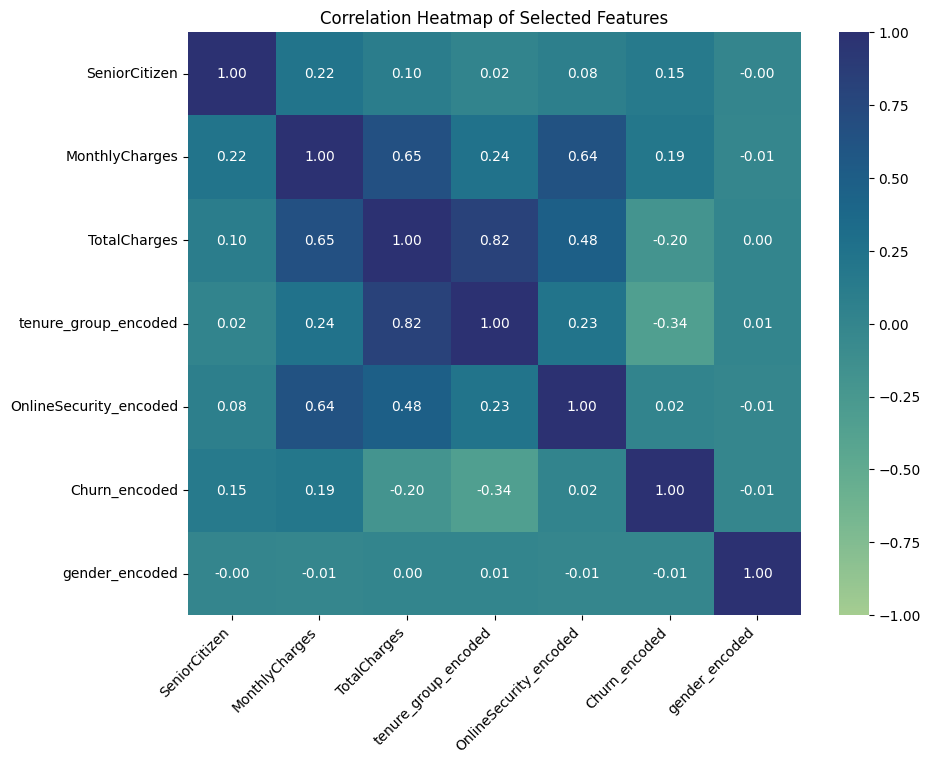

In [126]:
# Ensure TotalCharges is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Encode gender (Male: 1, Female: 0)
df['gender_encoded'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Encode Churn to binary (1 for Yes, 0 for No) - using a single consistent encoding
df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode OnlineSecurity (Yes: 1, No: 0, No internet service: -1)
df['OnlineSecurity_encoded'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': -1})

# Encode tenure_group (assuming ordered categories, e.g., short to long tenure)
label_encoder = LabelEncoder()
df['tenure_group_encoded'] = label_encoder.fit_transform(df['tenure_group'])

# Select numeric columns for correlation
numeric_cols = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure_group_encoded', 'OnlineSecurity_encoded', 'Churn_encoded', 'gender_encoded']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap with adjusted layout and labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest', vmin=-1, vmax=1, center=0, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better alignment
plt.yticks(rotation=0)  # Keep y-axis labels vertical
plt.tight_layout(pad=2.0)  # Adjust padding to prevent overlap


plt.show()
